In [1]:
import torch
import torch.nn as nn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator

from einops import rearrange, repeat, reduce

from darts.datasets import AirPassengersDataset

In [3]:
from darts.datasets import ETTh1Dataset

# Dataset

In [4]:
data = ETTh1Dataset().load()
time_series = data.values()
time_series.shape

(17420, 7)

In [5]:
data.head(3)

<TimeSeries (DataArray) (date: 3, component: 7, sample: 1)> Size: 168B
array([[[ 5.82700014],
        [ 2.00900006],
        [ 1.59899998],
        [ 0.46200001],
        [ 4.20300007],
        [ 1.34000003],
        [30.53100014]],

       [[ 5.69299984],
        [ 2.07599998],
        [ 1.49199998],
        [ 0.426     ],
        [ 4.1420002 ],
        [ 1.37100005],
        [27.78700066]],

       [[ 5.15700006],
        [ 1.74100006],
        [ 1.27900004],
        [ 0.35499999],
        [ 3.77699995],
        [ 1.21800005],
        [27.78700066]]])
Coordinates:
  * date       (date) datetime64[ns] 24B 2016-07-01 ... 2016-07-01T02:00:00
  * component  (component) object 56B 'HUFL' 'HULL' 'MUFL' ... 'LULL' 'OT'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [6]:
data.components
#data.columns

Index(['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT'], dtype='object', name='component')

In [7]:
print(data.is_univariate)
print(data.is_stochastic)
print(data.is_deterministic)
print(data.is_probabilistic)

False
False
True
False


In [8]:
df = data.pd_dataframe()
df

component,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
date,,,,,,,
2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...
2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000


In [10]:
df.columns.tolist()

['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT']

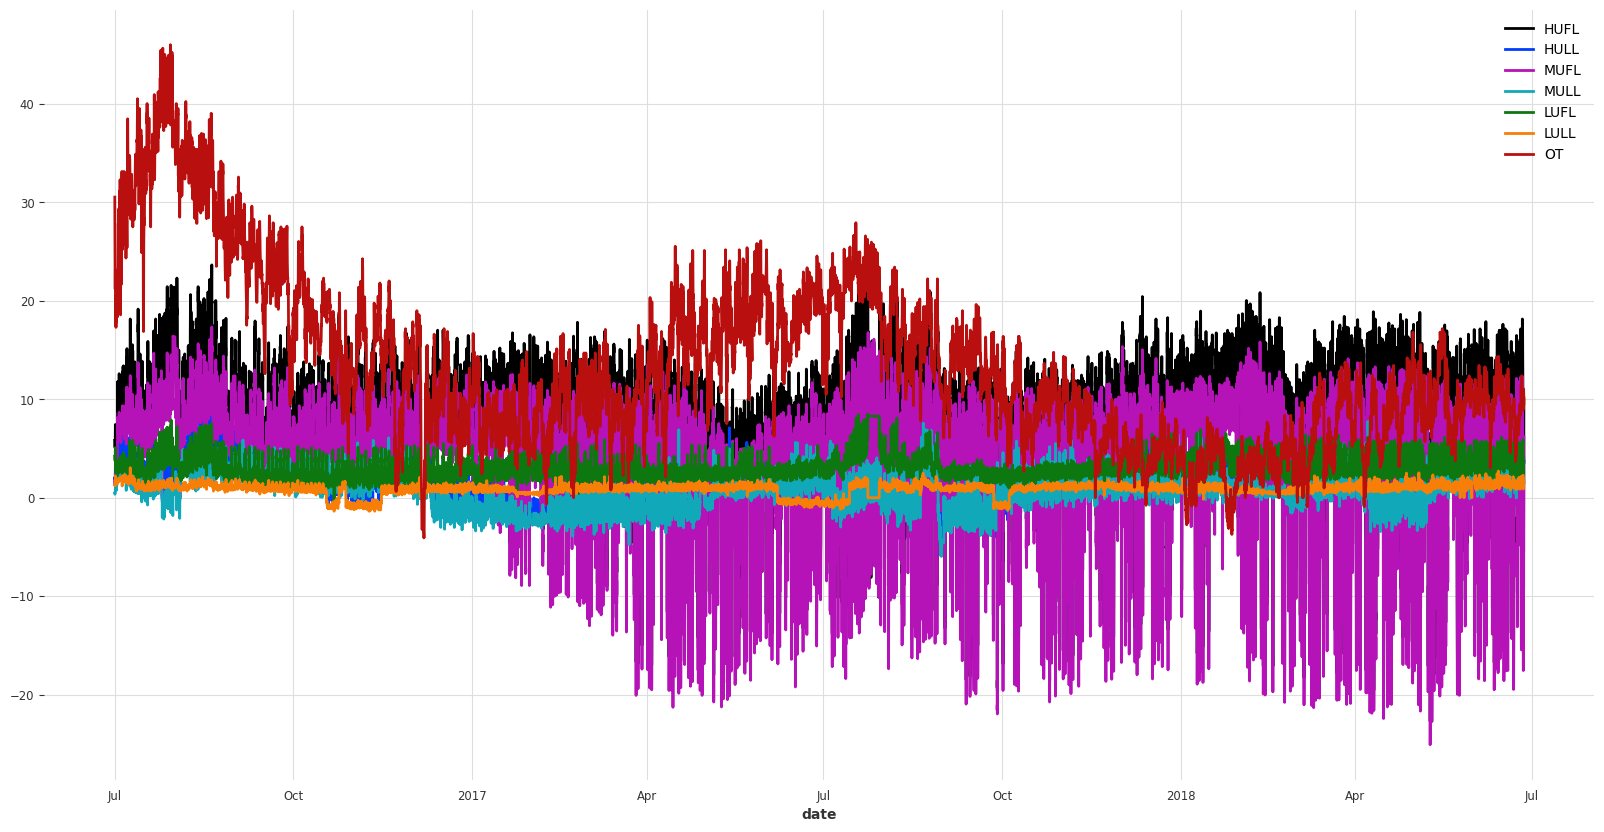

In [11]:
plt.figure(figsize=(20,10))
data.plot()
plt.show()

(13935, 7)
(3485, 7)


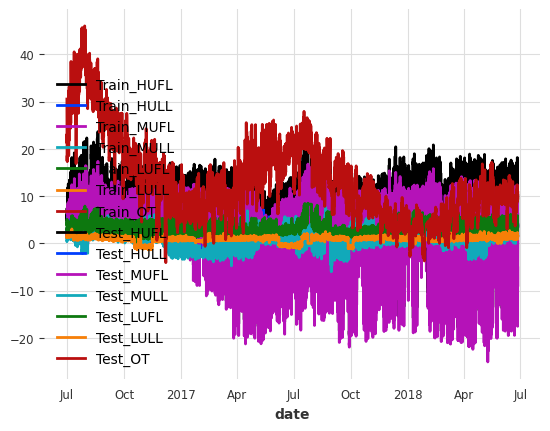

In [12]:
train, test = data.split_before(0.80)
train.plot(label="Train")
test.plot(label="Test")
print(train.values().shape)
print(test.values().shape)

# ARIMAX

# SARIMAX

# N-Beats

In [47]:
from darts.models import NBEATSModel

In [49]:
model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=50, random_state=123)
model.fit(train)
pred = model.predict(n=43, series=train)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='date'>

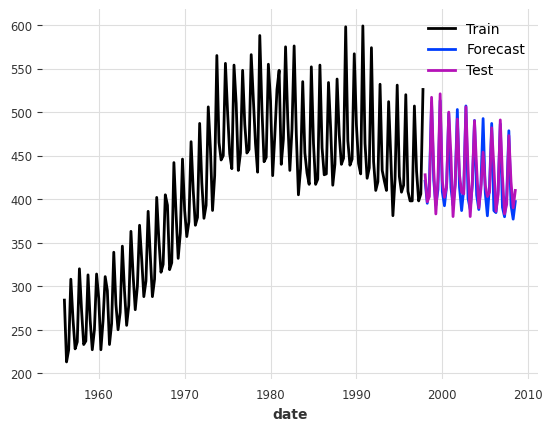

In [50]:
train.plot(label='Train')
pred.plot(label='Forecast')
test.plot(label='Test')

In [51]:
print(f"RMSE: {np.sqrt(mean_squared_error(test.values(), pred.values()))}")
print(f" MAE: {mean_absolute_error(test.values(), pred.values())}")

RMSE: 17.392083223732023
 MAE: 12.59468563355389


# Theta 

# Transformer

# XGBoost